In [93]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)


In [3]:
reduced_df = pd.read_csv('reduced_dataset.csv')
reduced_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11712418,JC293095,03/01/2019 12:00:00 AM,113XX S edbrooke ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,9.0,49.0,11,NaN,NaN,2019,06/06/2019 04:10:57 PM,NaN,NaN,NaN
1,11610091,JC169676,03/01/2019 12:00:00 AM,040XX W HARRISON ST,0820,THEFT,$500 AND UNDER,CTA STATION,False,False,...,24.0,26.0,06,1149650.0,1897057.0,2019,03/08/2019 04:36:43 PM,41.873441,-87.726029,"(41.87344095, -87.726029327)"
2,11610331,JC170042,03/01/2019 12:00:00 AM,016XX N MILWAUKEE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,2.0,24.0,07,1162253.0,1911059.0,2019,03/08/2019 04:36:43 PM,41.911610,-87.679366,"(41.911609558, -87.679365506)"
3,11610435,JC170027,03/01/2019 12:00:00 AM,080XX S RHODES AVE,0320,ROBBERY,STRONGARM - NO WEAPON,APARTMENT,False,True,...,6.0,44.0,03,1181298.0,1851882.0,2019,03/08/2019 04:36:43 PM,41.748804,-87.611228,"(41.748803893, -87.611228284)"
4,11610928,JC170668,03/01/2019 12:00:00 AM,081XX S STONY ISLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,True,True,...,8.0,45.0,08B,1188340.0,1851428.0,2019,03/08/2019 04:36:43 PM,41.747393,-87.585439,"(41.747393001, -87.585438607)"


In [4]:
reduced_df['Primary Type'].value_counts()

THEFT                                145972
BATTERY                              133354
CRIMINAL DAMAGE                       78258
ASSAULT                               60578
DECEPTIVE PRACTICE                    53754
OTHER OFFENSE                         43737
MOTOR VEHICLE THEFT                   31223
NARCOTICS                             25616
BURGLARY                              25220
WEAPONS VIOLATION                     24688
ROBBERY                               24493
CRIMINAL TRESPASS                     14241
OFFENSE INVOLVING CHILDREN             6244
CRIMINAL SEXUAL ASSAULT                3581
SEX OFFENSE                            3423
PUBLIC PEACE VIOLATION                 3319
INTERFERENCE WITH PUBLIC OFFICER       2395
HOMICIDE                               2190
ARSON                                  1517
PROSTITUTION                           1013
STALKING                                826
CRIM SEXUAL ASSAULT                     816
CONCEALED CARRY LICENSE VIOLATIO

In [14]:
pd.to_datetime(reduced_df['Date'], format='%m/%d/%Y %H:%M:%S %p').dt.time

0         12:00:00
1         12:00:00
2         12:00:00
3         12:00:00
4         12:00:00
            ...   
688820    12:00:00
688821    12:00:00
688822    12:00:00
688823    12:00:00
688824    12:00:00
Name: Date, Length: 688825, dtype: object

In [21]:
res = reduced_df['Date'].str.split(' ', expand=True)
reduced_df['time'] = res[1] + res[2]
reduced_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date_time,time
0,11712418,JC293095,03/01/2019 12:00:00 AM,113XX S edbrooke ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,11,NaN,NaN,2019,06/06/2019 04:10:57 PM,NaN,NaN,NaN,2019-03-01 12:00:00,12:00:00AM
1,11610091,JC169676,03/01/2019 12:00:00 AM,040XX W HARRISON ST,0820,THEFT,$500 AND UNDER,CTA STATION,False,False,...,06,1149650.0,1897057.0,2019,03/08/2019 04:36:43 PM,41.873441,-87.726029,"(41.87344095, -87.726029327)",2019-03-01 12:00:00,12:00:00AM
2,11610331,JC170042,03/01/2019 12:00:00 AM,016XX N MILWAUKEE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,07,1162253.0,1911059.0,2019,03/08/2019 04:36:43 PM,41.911610,-87.679366,"(41.911609558, -87.679365506)",2019-03-01 12:00:00,12:00:00AM
3,11610435,JC170027,03/01/2019 12:00:00 AM,080XX S RHODES AVE,0320,ROBBERY,STRONGARM - NO WEAPON,APARTMENT,False,True,...,03,1181298.0,1851882.0,2019,03/08/2019 04:36:43 PM,41.748804,-87.611228,"(41.748803893, -87.611228284)",2019-03-01 12:00:00,12:00:00AM
4,11610928,JC170668,03/01/2019 12:00:00 AM,081XX S STONY ISLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,True,True,...,08B,1188340.0,1851428.0,2019,03/08/2019 04:36:43 PM,41.747393,-87.585439,"(41.747393001, -87.585438607)",2019-03-01 12:00:00,12:00:00AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688820,12669986,JF207057,03/31/2022 12:00:00 AM,046XX S ELLIS AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,APARTMENT,False,False,...,17,1183699.0,1874490.0,2022,04/15/2022 04:48:00 PM,41.810787,-87.601725,"(41.810786647, -87.601725398)",2022-03-31 12:00:00,12:00:00AM
688821,12670368,JF207420,03/31/2022 12:00:00 AM,008XX N KEDVALE AVE,0810,THEFT,OVER $500,STREET,False,False,...,06,1148564.0,1905334.0,2022,04/16/2022 04:46:10 PM,41.896175,-87.729803,"(41.896174973, -87.729802887)",2022-03-31 12:00:00,12:00:00AM
688822,12669051,JF205850,03/31/2022 12:00:00 AM,007XX E 105TH PL,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,08B,1183089.0,1835159.0,2022,04/23/2022 04:52:21 PM,41.702873,-87.605184,"(41.702872581, -87.605183816)",2022-03-31 12:00:00,12:00:00AM
688823,12676969,JF215413,03/31/2022 12:00:00 AM,050XX W ADAMS ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,26,1142947.0,1898864.0,2022,04/24/2022 04:48:35 PM,41.878527,-87.750595,"(41.878527089, -87.750594629)",2022-03-31 12:00:00,12:00:00AM


In [29]:
# Function to convert from 12 hour to 24 hour format
def convert24(str1):
      
    # Checking if last two elements of time
    # is AM and first two elements are 12
    if str1[-2:] == "AM" and str1[:2] == "12":
        return "00" + str1[2:-2]
          
    # remove the AM    
    elif str1[-2:] == "AM":
        return str1[:-2]
      
    # Checking if last two elements of time
    # is PM and first two elements are 12   
    elif str1[-2:] == "PM" and str1[:2] == "12":
        return str1[:-2]
          
    else:
          
        # add 12 to hours and remove PM
        return str(int(str1[:2]) + 12) + str1[2:8]

In [31]:
convert24('12:00:00AM')

'00:00:00'

In [37]:
reduced_df['24hr'] = reduced_df['time'].apply(convert24)
reduced_df['hour'] = reduced_df['24hr'].apply(lambda x: x[:2])
reduced_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date_time,time,24hr,hour
0,11712418,JC293095,03/01/2019 12:00:00 AM,113XX S edbrooke ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,2019,06/06/2019 04:10:57 PM,NaN,NaN,NaN,2019-03-01 12:00:00,12:00:00AM,00:00:00,00
1,11610091,JC169676,03/01/2019 12:00:00 AM,040XX W HARRISON ST,0820,THEFT,$500 AND UNDER,CTA STATION,False,False,...,1897057.0,2019,03/08/2019 04:36:43 PM,41.873441,-87.726029,"(41.87344095, -87.726029327)",2019-03-01 12:00:00,12:00:00AM,00:00:00,00
2,11610331,JC170042,03/01/2019 12:00:00 AM,016XX N MILWAUKEE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1911059.0,2019,03/08/2019 04:36:43 PM,41.911610,-87.679366,"(41.911609558, -87.679365506)",2019-03-01 12:00:00,12:00:00AM,00:00:00,00
3,11610435,JC170027,03/01/2019 12:00:00 AM,080XX S RHODES AVE,0320,ROBBERY,STRONGARM - NO WEAPON,APARTMENT,False,True,...,1851882.0,2019,03/08/2019 04:36:43 PM,41.748804,-87.611228,"(41.748803893, -87.611228284)",2019-03-01 12:00:00,12:00:00AM,00:00:00,00
4,11610928,JC170668,03/01/2019 12:00:00 AM,081XX S STONY ISLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,True,True,...,1851428.0,2019,03/08/2019 04:36:43 PM,41.747393,-87.585439,"(41.747393001, -87.585438607)",2019-03-01 12:00:00,12:00:00AM,00:00:00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688820,12669986,JF207057,03/31/2022 12:00:00 AM,046XX S ELLIS AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,APARTMENT,False,False,...,1874490.0,2022,04/15/2022 04:48:00 PM,41.810787,-87.601725,"(41.810786647, -87.601725398)",2022-03-31 12:00:00,12:00:00AM,00:00:00,00
688821,12670368,JF207420,03/31/2022 12:00:00 AM,008XX N KEDVALE AVE,0810,THEFT,OVER $500,STREET,False,False,...,1905334.0,2022,04/16/2022 04:46:10 PM,41.896175,-87.729803,"(41.896174973, -87.729802887)",2022-03-31 12:00:00,12:00:00AM,00:00:00,00
688822,12669051,JF205850,03/31/2022 12:00:00 AM,007XX E 105TH PL,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,1835159.0,2022,04/23/2022 04:52:21 PM,41.702873,-87.605184,"(41.702872581, -87.605183816)",2022-03-31 12:00:00,12:00:00AM,00:00:00,00
688823,12676969,JF215413,03/31/2022 12:00:00 AM,050XX W ADAMS ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1898864.0,2022,04/24/2022 04:48:35 PM,41.878527,-87.750595,"(41.878527089, -87.750594629)",2022-03-31 12:00:00,12:00:00AM,00:00:00,00


In [38]:
def stackplot_data(hours, crime_type):
    df_lst = []
    for hour in hours:
        crime_df = reduced_df.loc[reduced_df['Primary Type'] == crime_type]
        hour_df = crime_df.loc[crime_df['hour'] == hour]
        df_lst.append(len(hour_df))
    return df_lst

In [44]:
hours = ['00', '01', '02', '03', '04', '05', '06', "07", '08', '09', '10', '11', '12','13','14', '15','16','17','18','19','20','21','22','23']

In [71]:
res_theft = np.array(stackplot_data(hours, 'THEFT'))
res_theft

array([ 6781,  3233,  2890,  2478,  2066,  1913,  2356,  3463,  4747,
        6271,  6972,  7186, 10075,  8553,  8977,  9292,  9154,  9374,
        8983,  8155,  7244,  5938,  5538,  4333])

In [72]:
res_battery = np.array(stackplot_data(hours, 'BATTERY'))
res_battery

array([7329, 6114, 5394, 4248, 3213, 2569, 2369, 2998, 3932, 4634, 5187,
       5640, 5903, 5654, 5906, 6658, 6750, 6828, 6806, 6787, 7063, 7043,
       7251, 7078])

In [73]:
res_criminal_damage = np.array(stackplot_data(hours, 'CRIMINAL DAMAGE'))
res_criminal_damage

array([5312, 3458, 2944, 2735, 2217, 1878, 1857, 2129, 2441, 2884, 2821,
       2569, 3222, 2685, 3009, 3246, 3641, 3984, 4121, 3920, 4192, 4262,
       4731, 4000])

In [74]:
res_assault = np.array(stackplot_data(hours, 'ASSAULT'))
res_assault

array([2285, 1630, 1338,  978,  825,  754,  899, 1492, 2214, 2763, 3117,
       3374, 3590, 3295, 3372, 3928, 3832, 3554, 3475, 3251, 3101, 2752,
       2462, 2297])

In [75]:
res_deceptive_practice = np.array(stackplot_data(hours, 'DECEPTIVE PRACTICE'))
res_deceptive_practice

array([6305,  453,  390,  277,  221,  264,  476,  846, 2805, 5877, 3686,
       2750, 7185, 3257, 3432, 3521, 2821, 2527, 1927, 1469, 1231,  869,
        650,  515])

In [76]:
len(hours), len(res_theft), len(res_battery), len(res_criminal_damage), len(res_assault), len(res_deceptive_practice)

(24, 24, 24, 24, 24, 24)

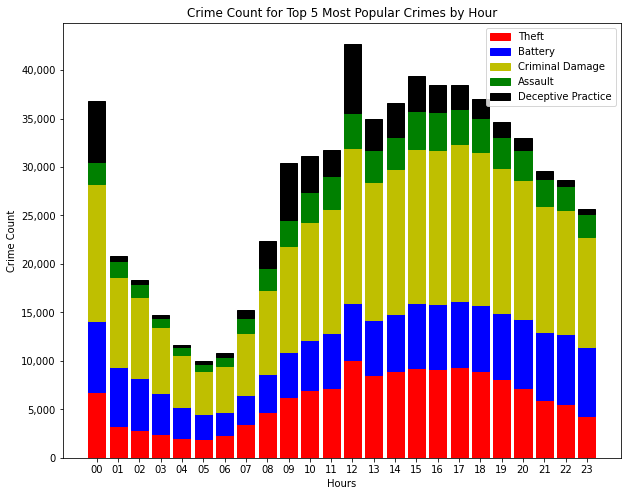

In [96]:
# plot bars in stack manner
plt.bar(hours, res_theft, color='r', edgecolor='r')
plt.bar(hours, res_battery, bottom=res_theft, color='b', edgecolor='b')
plt.bar(hours, res_criminal_damage, bottom=np.add(res_theft, res_battery), color='y', edgecolor='y')
plt.bar(hours, res_assault, bottom=np.add(np.add(res_theft, res_battery), res_criminal_damage), color='g', edgecolor='g')
plt.bar(hours, res_deceptive_practice, bottom=np.add(np.add(np.add(res_theft, res_battery), res_criminal_damage), res_assault), color='k', edgecolor='k')
plt.xlabel("Hours")
plt.ylabel("Crime Count")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(["Theft", "Battery", "Criminal Damage", "Assault", "Deceptive Practice"])
plt.title("Crime Count for Top 5 Most Popular Crimes by Hour")
plt.show()